In [174]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy as sc
import mpmath as mp

In [175]:
def f(x):
    return mp.sqrt(x)

In [176]:
def w(t):
    return mp.sqrt((1-(t-1)**2))

In [177]:
#transforms chebyshew points to interval [a,b]

def transform_cheb(nodes, a, b):
    for i in range(len(nodes)):
        nodes[i] = a+(b-a)*(nodes[i]+1)/2
    return nodes
#calculates n standard chebyshew points on interval[1,1]
  
def get_nodes_cheb(n):
    nodes = np.empty(shape=n, dtype=float)
    for i in range(1,n+1):
        nodes[i-1] = mp.cos((mp.pi*(2*i-1))/(2*n))
    return nodes

In [178]:
base_functions = [lambda x: 1, lambda x: x-1, lambda x: 2*x**2 - 4*x  +1]

In [179]:
def polynomial_value(x,c):
    result = 0 
    for i in range(len(c)-1,-1,-1):
        result = (result*x) + c[i]
    return result


In [180]:
c = np.zeros(3)
c[0] =0.9
c[1] = 0.6
c[2] = -0.12
# for i in range(0,3):
#     # print((lambda x: w(cheb_points[i])*(lambda x : f(x)*base_functions[i](x))(x))(0.2))
#     c[i] = 2/np.pi*integrate.quad(lambda x: f(x)*base_functions[i](x)/w(x),-1,1)[0]
    


[0.18000000000000005, 0.188388, 0.19675200000000004, 0.20509200000000016, 0.21340800000000015, 0.22170000000000012, 0.22996800000000006, 0.2382120000000001, 0.2464320000000001, 0.2546280000000002, 0.26280000000000014, 0.2709480000000001, 0.2790720000000001, 0.2871720000000002, 0.2952480000000002, 0.3033000000000001, 0.31132800000000016, 0.31933200000000017, 0.32731200000000016, 0.33526800000000023, 0.34320000000000017, 0.3511080000000002, 0.3589920000000002, 0.3668520000000003, 0.37468800000000024, 0.3825000000000002, 0.3902880000000002, 0.3980520000000002, 0.40579200000000026, 0.41350800000000026, 0.42120000000000024, 0.42886800000000025, 0.43651200000000023, 0.4441320000000003, 0.4517280000000003, 0.45930000000000026, 0.46684800000000026, 0.47437200000000024, 0.4818720000000003, 0.48934800000000034, 0.4968000000000003, 0.5042280000000003, 0.5116320000000003, 0.5190120000000004, 0.5263680000000004, 0.5337000000000003, 0.5410080000000004, 0.5482920000000003, 0.5555520000000004, 0.56278

TypeError: float() argument must be a string or a real number, not 'mpc'

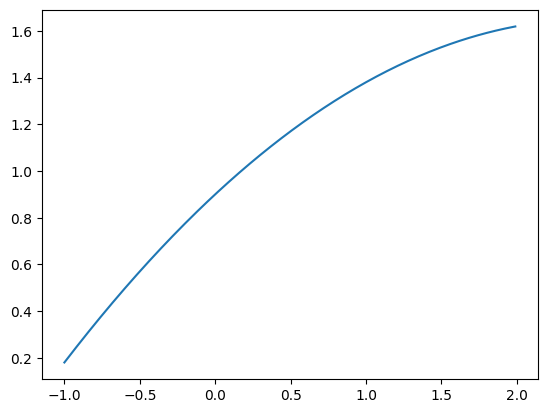

In [181]:
x_space = np.arange(-1, 2, 0.01)
y_space = [polynomial_value(x, c) for x in x_space]
print(y_space)
y2 = [f(x) for x in x_space]
plt.plot(x_space,y_space)
plt.plot(x_space,y2)